In [84]:
import pandas as pd
import numpy as np

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# 5. 추정과 가설 검정
- 구간추정 : 점추정 + 오차의 개념
- 가설검정 : 귀무가설과 대립가설을 세우고, 귀무가설의 모수와 표본에서 얻은 값으로 검정통계량을 계산하여 귀무가설의 기각여부 판단
    - 검정 통계량이 채택역에 있는지 여부 / 유의수준과 유의확률의 비교 / 검정하고자 하는 값의 신뢰구간 아래 여부
- 1종오류 : 귀무가설이 참인데 대립가설을 채택하는 오류
- 2종오류 : 대립가설이 참인데 귀무가설을 채택하는 오류 (1-2종오류 : 검정력)
    - 두 오류는 트레이드 오프
    
## 5-1 일표본
### 모평균의 추정과 가설 검정 : Z분포, t분포
$\mu:\ 모평균,\ \mu_0:\ 귀무가설의\ 모평균,\ \sigma:\ 모표준편차,\ X:\ 표본평균,\ S:\ 표본표준편차,\\ n:\ 표본의\ 크기, \ z_{\alpha/2}:\ 신뢰계수,\ t_{\alpha/2,(n-1)}:\ 신뢰계수 $
- 추정
    - 표본의 크기가 30 이상이거나, 모집단의 분산을 아는 경우
    $$ Z=\frac{X-\mu}{\sigma/\sqrt{n}}\sim N(0,1) \\ \bar{X}-z_{\alpha/2}\frac{\sigma}{\sqrt{n}}<\mu<bar{X}+z_{\alpha/2}\frac{\sigma}{\sqrt{n}}$$
    - 표본의 크기가 30 미만이고, 모집단의 분산을 모르는 경우
    $$ t=\frac{X-\mu}{S/\sqrt{n}}\sim t_{(n-1)} \\ \bar{X}-t_{\alpha/2, (n-1)}\frac{S}{\sqrt{n}}<\mu<bar{X}+t_{\alpha/2,(n-1)}\frac{S}{\sqrt{n}}$$
- 가설검정
    - 표본의 크기가 30 이상이거나 모집단의 분산을 아는 경우 $Z=\frac{X-\mu_0}{\sigma/\sqrt{n}} \sim N(0,1)$
    - 표본의 크기가 30 미만이고 모집단의 분산을 모르는 경우 $t=\frac{X-\mu_0}{S/\sqrt{n}} \sim t_{(n-1)}$
- 중심극한정리 : 표본의 개수가 커질수록 표본평균의 확률분포는 정규분포에 가까워짐
- 큰 수의 법칙 : 표본 개수가 커질수록 표본평균의 값은 모평균의 값에 가까워짐

In [2]:
# 모표준편차를 아는 경우
## 모평균 추정
x = 31100; n = 36; sigma = 4500; conf_a = 0.05

se = sigma / np.sqrt(n)
conf_z = stats.norm.ppf(1-conf_a/2)
me = conf_z * se # 허용오차 margin of error

print("[추정]\n 점 추정량: {:.3f} \n 구간추정량 : {:.3f}~{:.3f}\n 오차의 한계: {:.3f}".format(x, x-me, x+me, me))

[추정]
 점 추정량: 31100.000 
 구간추정량 : 29630.027~32569.973
 오차의 한계: 1469.973


In [3]:
# 오차의 한계에 따른 표본 규모
## 오차의 한계가 500 이하일 확률이 0.95가 되도록 모집단 평균의 추정치를 원하는 경우, 표본 규모는 얼마가 되어야 하는가?
me = 500; conf_a = 1-0.95; conf_z = stats.norm.ppf(conf_a/2)
ssize = conf_z**2 * sigma**2 / me**2
print("[표본 규모]")
print("유의수준 {:.2f}에서 오차의 한계를 {} 이하로 하려면: 표본 규모 {:.1f} 이상".format(conf_a, me, ssize))

[표본 규모]
유의수준 0.05에서 오차의 한계를 500 이하로 하려면: 표본 규모 311.2 이상


In [4]:
# 모평균의 가설검정
# H0 : mu = mu0, H1 : mu != mu0
x = 31100; n = 36; sigma = 4500; mu0 = 30000; test_a = 0.05

se = sigma/np.sqrt(n)
zstat = (x-mu0)/se

ways = 'two'
if ways == 'two':
    sp = (1-stats.norm.cdf(np.abs(zstat)))*2
    cv = stats.norm.ppf(1-test_a/2)
    cv = "+/-{:.3f}".format(cv)
elif ways == 'one-right':
    sp = (1-stats.norm.cdf(zstat))
    cv = stats.norm.ppf(1-test_a)
    cv = "{:.3f}".format(cv)
elif ways == 'one-left':
    sp = (1-stats.norm.cdf(zstat))
    cv = stats.norm.ppf(test_a)
    cv = "{:.3f}".format(cv)

print("[검정]")        
print(" 임계값 : {}, 검정통계량: {:.3f}".format(cv, zstat))
print(" 유의수준 : {:.3f}, 유의확률: {:.3f}".format(test_a, sp))

[검정]
 임계값 : +/-1.960, 검정통계량: 1.467
 유의수준 : 0.050, 유의확률: 0.142


In [5]:
# 모표준편차 모르는 경우
## 모평균의 추정
x = 650; n = 16; s = 55; conf_a = 0.05 ; df = n-1

se = s / np.sqrt(n)
conf_t = stats.t.ppf(1-conf_a/2, df)
me = conf_t * se

print("[추정]")
print(" 점 추정량 : {:.3f}".format(x))
print(" 구간 추정량 : {:.3f}~{:.3f}".format(x-me, x+me))
print(" 오차의 한계 : {:.3f}".format(me))

[추정]
 점 추정량 : 650.000
 구간 추정량 : 620.693~679.307
 오차의 한계 : 29.307


In [6]:
## 오차의 한계에 따른 표본 규모
## 오차의 한계가 20이하일 확률이 0.95가 되도록 모집단의 평균 추정치를 원하는 경우, 표본 규모는 얼마?

me2 = 20; conf_a2 = 1-0.95; conf_t2 = stats.t.ppf(conf_a2/2, df)
ssize = conf_t2**2 * s**2 / me2**2

print("[표본규모]")
print(f" 유의수준 {conf_a2:.2f}에서 오차의 한계를 {me2:.2f} 이하로 하려면: 표본크기 {ssize:.1f} 이상")

[표본규모]
 유의수준 0.05에서 오차의 한계를 20.00 이하로 하려면: 표본크기 34.4 이상


In [7]:
# 모평균의 가설검정 (one-sample t-test)
# H0 : mu = mu0, H1 : mu > mu0
mu0 = 600; test_a = 0.05; x = 650; n = 16; s = 55; df = n-1

se = s / np.sqrt(n)
tstat = (x-mu0)/se

ways = 'one-right'
if ways == 'two':
    sp = (1-stats.t.cdf(np.abs(zstat), df))*2
    cv = stats.t.ppf(1-test_a/2, df)
    cv = "+/-{:.3f}".format(cv)
elif ways == 'one-right':
    sp = (1-stats.t.cdf(zstat, df))
    cv = stats.t.ppf(1-test_a, df)
    cv = "{:.3f}".format(cv)
elif ways == 'one-left':
    sp = (1-stats.t.cdf(zstat, df))
    cv = stats.t.ppf(test_a, df)
    cv = "{:.3f}".format(cv)

print("[검정]")        
print(" 임계값 : {}, 검정통계량: {:.3f}".format(cv, zstat))
print(" 유의수준 : {:.3f}, 유의확률: {:.3f}".format(test_a, sp))

[검정]
 임계값 : 1.753, 검정통계량: 1.467
 유의수준 : 0.050, 유의확률: 0.082


### 모비율의 추정과 가설검정 : Z 분포
$p: 모비율, p_0:귀무가설의 모비율, \hat{p}:표본비율, n: 표본의 크기, z_{\alpha/2}:신뢰계수$

[추정]
$$
Z=\frac{\hat{p}-p}{\sqrt{\hat{p}(1-\hat{p})}/n}\quad \sim N(0,1) \\
\hat{p} - z_{\alpha/2}\sqrt{\frac{\hat{p}(1-\hat{p})}{n}} < p < \hat{p} + z_{\alpha/2}\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
$$

[가설검정]
$$ Z=\frac{\hat{p}-p_0}{\sqrt{p_0(1-p_0)}/n}\quad \sim N(0,1) $$

In [8]:
# 모비율의 추정
n = 500; p = 220/500 ; conf_a = 0.05
se = np.sqrt(p*(1-p)/n)
conf_z = stats.norm.ppf(1-conf_a/2)
me = conf_z * se

print("[추정]")
print(" 점 추정량 : {:.3f}".format(p))
print(" 구간 추정량 : {:.3f}~{:.3f}".format(p-me, p+me))
print(" 오차의 한계 : {:.3f}".format(me))

[추정]
 점 추정량 : 0.440
 구간 추정량 : 0.396~0.484
 오차의 한계 : 0.044


In [9]:
# 표본규모 계산 : 모비율 p를 아는 경우에는 P를 사용, 아니면 표본비율 p로 계산, 두 정보 모두 없다면 p=0.5로 계산
## 오차의 한계가 0.03 이하일 확률이 0.99가 되도록 모집단 비율의 추정치를 원하는 경우, 표본 규모는 얼마?

me2 = 0.03; conf_a2 = 1-0.99; conf_z2 = stats.norm.ppf(1-conf_a2/2)
ssize = conf_z2**2 * p * (1-p) / me2 ** 2
print("[표본규모]")
print(f" 유의수준 {conf_a2:.2f}에서 오차의 한계를 {me2:.2f} 이하로 하려면: 표본크기 {ssize:.1f} 이상")

[표본규모]
 유의수준 0.01에서 오차의 한계를 0.03 이하로 하려면: 표본크기 1816.5 이상


In [10]:
# 모비율의 가설검정
## H0: P = P0, H1: P != P0
n = 500; p = 220/500 ; P0 = 0.5; test_a = 0.05
se = np.sqrt(P0 * (1-P0)/n); zstat = (p - P0)/se

ways = 'two' # 'one-right(P>P0)', 'one-left(P<P0)'
if ways == 'two':
    sp = (1-stats.norm.cdf(np.abs(zstat)))*2
    cv = stats.norm.ppf(1-test_a/2)
    cv = "+/-{:.3f}".format(cv)
elif ways == 'one-right':
    sp = (1-stats.norm.cdf(zstat))
    cv = stats.norm.ppf(1-test_a)
    cv = "{:.3f}".format(cv)
elif ways == 'one-left':
    sp = (1-stats.norm.cdf(zstat))
    cv = stats.norm.ppf(test_a)
    cv = "{:.3f}".format(cv)

print("[검정]")        
print(" 임계값 : {}, 검정통계량: {:.3f}".format(cv, zstat))
print(" 유의수준 : {:.3f}, 유의확률: {:.3f}".format(test_a, sp))

[검정]
 임계값 : +/-1.960, 검정통계량: -2.683
 유의수준 : 0.050, 유의확률: 0.007


### 모분산의 추정과 가설검정 : 카이제곱 분포
$\alpha: 모표준편차,\ \sigma_0: 귀무가설의 모표준편차,\ \mu:\ 모평균,\ S:\ 표본표준편차,\ n:\ 표본의 크기, \ \chi^2_{\alpha/2,n-1}: 신뢰계수$

[추정]
- 모평균을 모르는 경우
$$
\chi^2 = \frac{(n-1)S^2}{\sigma^2} \sim \chi^2_{(n-1)} \\
(n-1)S^2/\chi^2_{\alpha/2,n-1} < \sigma^2 < (n-1)S^2/\chi^2_{(1-\alpha)/2,n-1}
$$
- 모평균을 아는 경우
$$
\chi^2 = \frac{\sum^n_{i=1}(x_i-\mu)^2}{\sigma^2} \sim \chi^2_{(n-1)} \\
\sum^n_{i=1}(x_i-\mu)^2/\chi^2_{\alpha/2,n-1} < \sigma^2 < \sum^n_{i=1}(x_i-\mu)^2/\chi^2_{(1-\alpha)/2,n-1}
$$

[가설검정]
- 모평균을 모르는 경우의 통계량
$$ \chi^2=\frac{(n-1)S^2}{\sigma^2_0} \sim \chi^2_{(n-1)}$$
- 모평균을 아는 경유의 통계량
$$ \chi^2=\frac{\sum^n_{i=1}(x_i-\mu)^2}{\sigma^2_0} \sim \chi^2_{(n-1)}$$

In [11]:
# 모평균을 모르는 경우
## 모분산의 추정
n = 10; v = 3.4; df = n-1 ; conf_a = 0.05

conf_c1 = stats.chi2.ppf(1-conf_a/2, df)
conf_c2 = stats.chi2.ppf(conf_a/2, df)
cr1 = df * v / conf_c1
cr2 = df * v / conf_c2

print("[추정]")
print(f"점 추정량: {v:.3f}")
print(f"구간 추정량: {cr1:.3f} ~ {cr2:.3f}")

[추정]
점 추정량: 3.400
구간 추정량: 1.609 ~ 11.332


In [12]:
# 가설검정 (왼쪽 검정)
# H0 : sigma^2 = v0, H1 : sigma^2 < v0
n = 10; v = 3.4; df = n-1; v0 = 3.6; test_a = 0.05

cstat = df * v / v0

ways = 'one-left' # 'two', 'one-right(sigma^2>v0)', 'one-left(sigma^2<v0)'
if ways == 'two':
    if stats.chi2.cdf(stats, df) < 0.5:
        sp = stats.chi2.cdf(cstat, df)*2
    else: 
        sp = (1-stats.chi2.cdf(cstat, df))*2
    cv1 = stats.chi2.ppf(test_a/2, df)
    cv2 = stats.chi2.ppf(1-test_a/2, df)
    cv = f"{cv1:.3f}와 {cv2:.3f}"
elif ways == 'one-right':
    sp = 1 - stats.chi2.cdf(cstat, df)
    cv = stats.chi2.ppf(1-test_a, df) 
    cv = f"{cv:.3f}"
elif ways == 'one-left':
    sp = stats.chi2.cdf(cstat, df)
    cv = stats.chi2.ppf(test_a, df) 
    cv = f"{cv:.3f}"    
    
print("[검정]")
print(f"임계값 : {cv}, 검정통계량 {cstat:.3f}")
print(f"유의수준: {test_a:.3f}, 유의확률: {sp:.3f}")

[검정]
임계값 : 3.325, 검정통계량 8.500
유의수준: 0.050, 유의확률: 0.515


## 5.2 이표본 (Two-sample)
### 독립표본 모평균 차이의 추정과 가설검정 : Z분포, t분표
$\mu_1-\mu_2:\ 모평균의\ 차,\ \mu_{0,(1)}-\mu_{0,(2)}:\ 귀무가설\ 모평균의\ 차,\ X_1-X_2:\ 표본평균의\ 차,\ \sigma_1, \sigma_2:\ 각\ 표본의\ 모표준편차,\ S_1,S_2:\ 각\ 표본의\ 표본표준편차,\ n_1, n_2:\ 각\ 표본의\ 크기,\ z_{\frac{\alpha}{2}}:\ 신뢰계수, t_{\frac{\alpha}{2},(n_1+n_2-2)}:\ 신뢰계수\, t_{\frac{\alpha}{2},(df)}:\ 신뢰계수$

[추정] 
- 표본의 크기가 30이상이고 모집단의 분산을 아는 경우
$$
Z = \frac{X_1-X_2-(\mu_1-\mu_2)}{\sqrt{\sigma^2_1/n_1 + \sigma^2_2/n_2}}\quad \sim N(0,1) \\
(\bar{X_1}-\bar{X}_2)-z_{\frac{\alpha}{2}}\sqrt{\frac{\sigma^2_1}{n_1}+\frac{\sigma^2_2}{n_2}} < \mu_1 - \mu_2 < (\bar{X_1}-\bar{X}_2)+z_{\frac{\alpha}{2}}\sqrt{\frac{\sigma^2_1}{n_1}+\frac{\sigma^2_2}{n_2}}
$$
- 표본의 크기가 30 이상이고, 모집단의 분산을 모르는 경우
$$
Z = \frac{X_1-X_2-(\mu_1-\mu_2)}{\sqrt{s^2_1/n_1 + s^2_2/n_2}}\quad \sim N(0,1) \\
(\bar{X_1}-\bar{X}_2)-z_{\frac{\alpha}{2}}\sqrt{\frac{s^2_1}{n_1}+\frac{s^2_2}{n_2}} < \mu_1 - \mu_2 < (\bar{X_1}-\bar{X}_2)+z_{\frac{\alpha}{2}}\sqrt{\frac{s^2_1}{n_1}+\frac{s^2_2}{n_2}}
$$
- 표본의 크기가 30 미만이고, 모집단의 분산을 모르지만 두 모집단의 분산이 같다는 것을 알고 있을 경우
$$
t = \frac{X_1-X_2-(\mu_1-\mu_2)}{s_p\sqrt{1/n_1+1/n_2}}\quad \sim t_{(n_1+n_2-2)} \\
**합동표본분산\ S^2_p=\frac{(n_1-1)S^2_1+(n_2-1)S^2_2}{(n_1+n_2-2)} \\
(X_1-X_2)-t_{\frac{\alpha}{2},(n_1+n_2-2)S_p\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}} < \mu_1 - \mu_2 <
(X_1-X_2)+t_{\frac{\alpha}{2},(n_1+n_2-2)S_p\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}
$$
- 표본의 크기가 30 미만이고, 모집단의 분산을 모르지만 두 모집단의 분산이 다르다는 것을 알고 있을 경우
$$
t = \frac{X_1-X_2-(\mu_1-\mu_2)}{\sqrt{s^2_1/n_1+s^2_2/n_2}}\quad \sim t_{(df)} \\
**자유도\ df=\frac{(\frac{S^2_1}{n_1} + \frac{S^2_2}{n_2})^2}{\frac{1}{n_1-1}(\frac{S^2_1}{n_1})^2+\frac{1}{n_2-1}(\frac{S^2_2}{n_2})^2} \\
(X_1-X_2)-t_{\frac{\alpha}{2},(df)\sqrt{\frac{S^2_1}{n_1}+\frac{S^2_2}{n_2}}} < \mu_1 - \mu_2 <
(X_1-X_2)+t_{\frac{\alpha}{2},(df)\sqrt{\frac{S^2_1}{n_1}+\frac{S^2_2}{n_2}}}
$$

[가설검정] : t 분포를 활용한 검정을 t 검정이라고 함
- 표본의 크기가 30이상이고 모집단의 분산을 아는 경우 통계량
$$ Z = \frac{X_1-X_2-(\mu_{0(1)}-\mu_{0(2)})}{\sqrt{\sigma^2_1/n_1 + \sigma^2_2/n_2}} \sim N(0,1) $$
- 표본의 크기가 30이상이고 모집단의 분산을 모르는 경우 통계량
$$ Z = \frac{X_1-X_2-(\mu_{0(1)}-\mu_{0(2)})}{\sqrt{S^2_1/n_1 + S^2_2/n_2}} \sim N(0,1) $$
- 표본의 크기가 30 미만이고 모집단의 분산을 모르지만 두 모집단의 분산이 같다는 것을 알고 있을 경우의 통계량
$$t=\frac{X_1-X_2-(\mu_{0(1)}-\mu_{0(2)})}{s_p\sqrt{1/n_1+1/n_2}} \sim t_{(n_1+n_2-2)}$$
- 표본의 크기가 30 미만이고 모집단의 분산을 모르지만 두 모집단의 분산이 다르다는 것을 알고 있을 경우의 통계량
$$t=\frac{X_1-X_2-(\mu_{0(1)}-\mu_{0(2)})}{\sqrt{S^2_1/n_1+S^2_2/n_2}} \sim t_{(df)}$$


In [14]:
# 표본의 크기가 30 이상이고 모집단의 분산을 아는 경우
## 독립표본 모평균 차이의 추정
x1 = 78; x2 = 70; sigma1 = 4.8; sigma2 = 3.1; n1 = 16; n2 = 25; conf_a = 0.05

d = x1 - x2
se = np.sqrt(sigma1**2/n1 + sigma2**2/n2)
conf_z = stats.norm.ppf(1-conf_a/2)
me = conf_z * se

print('[추정]')
print(f" 점 추정량: {d:.3f}")
print(f" 구간 추정량: {d-me:.3f}~{d+me:.3f}")
print(f" 오차의 한계: {me:.3f}")

[추정]
 점 추정량: 8.000
 구간 추정량: 5.353~10.647
 오차의 한계: 2.647


In [16]:
## 독립표본 모평균 차이의 가설검정
# H0 : 모평균의 차 = D0, H1: 모평균의 차 != D0
test_a = 0.05; d0 = 0; 
d = x1 - x2
df = n1+n2-2
se = np.sqrt(sigma1**2/n1 + sigma2**2/n2)
zstat = (x1-x2-d0)/se

ways = 'two'
if ways == 'two':
    sp = (1-stats.norm.cdf(np.abs(zstat)))*2
    cv = stats.norm.ppf(1-test_a/2)
    cv = f"+/- {cv:.3f}"
elif ways == 'one-right':
    sp = (1-stats.norm.cdf(zstat))
    cv = stats.norm.ppf(1-test_a)
    cv = f"+/- {cv:.3f}"
elif ways == 'one-left':
    sp = (stats.norm.cdf(zstat))
    cv = stats.norm.ppf(test_a)
    cv = f"+/- {cv:.3f}"

print("[검정]")
print(f"임계값 : {cv}, 검정통계량 {zstat:.3f}")
print(f"유의수준: {test_a:.3f}, 유의확률: {sp:.3f}")

[검정]
임계값 : +/- 1.960, 검정통계량 5.923
유의수준: 0.050, 유의확률: 0.000


In [17]:
# 표본의 크기가 30 미만이고 모집단의 분산을 모르지만 같다는 것을 알고 있을 경우
## 독립표본 모평균의 차이 추정
x1=85; x2=81; s1=4; s2=5; n1=12; n2=10; conf_a=0.05

d = x1 - x2
df = n1+n2-2
pv = (s1**2*(n1-1) + s2**2*(n2-1)) / df # pooled variance
se = np.sqrt(pv) * np.sqrt(1/n1 + 1/n2)
conf_t = stats.t.ppf(1-conf_a/2, df)
me = conf_t * se

print("[추정]")
print(f" 점 추정량: {d:.3f}")
print(f" 구간 추정량: {d-me:.3f}~{d+me:.3f}")
print(f" 오차의 한계: {me:.3f}")
print(f" 합동 분산: {pv:.2f}")

[추정]
 점 추정량: 4.000
 구간 추정량: 0.001~7.999
 오차의 한계: 3.999
 합동 분산: 20.05


In [18]:
## 독립표본 모평균 차이의 가설검정
# H0 : 모평균의 차 = D0, H1: 모평균의 차 != D0
test_a = 0.05; d0 = 0; 
d = x1 - x2
df = n1+n2-2
pv = (s1**2*(n1-1) + s2**2*(n2-1)) / df
se = np.sqrt(pv) * np.sqrt(1/n1 + 1/n2)
tstat = (x1-x2-d0)/se

ways = 'two'
if ways == 'two':
    sp = (1-stats.t.cdf(np.abs(tstat), df))*2
    cv = stats.t.ppf(1-test_a/2, df)
    cv = f"+/- {cv:.3f}"
elif ways == 'one-right':
    sp = (1-stats.t.cdf(tstat, df))
    cv = stats.norm.ppf(1-test_a, df)
    cv = f"+/- {cv:.3f}"
elif ways == 'one-left':
    sp = (stats.t.cdf(tstat, df))
    cv = stats.t.ppf(test_a, df)
    cv = f"+/- {cv:.3f}"

print("[검정]")
print(f"임계값 : {cv}, 검정통계량 {tstat:.3f}")
print(f"유의수준: {test_a:.3f}, 유의확률: {sp:.3f}")

[검정]
임계값 : +/- 2.086, 검정통계량 2.086
유의수준: 0.050, 유의확률: 0.050


In [21]:
# 표본의 크기가 30 미만이고 모집단의 분산을 모르지만 다르다고 알고 있을 경우
## 독립표본 모평균 차이의 추정
x1=85; x2=81; s1=4; s2=5; n1=12; n2=10; conf_a=0.05

d = x1 - x2
df = ((s1**2)/n1 + (s2**2)/n2)**2 / (1/(n1-1) * ((s1**2)/n1)**2 + 1/(n2-1)*((s2**2)/n2)**2)
se = np.sqrt(s1**2/n1 + s2**2/n2)
conf_t = stats.t.ppf(1-conf_a/2, df)
me = conf_t * se

print("[추정]")
print(f" 점 추정량: {d:.3f}")
print(f" 구간 추정량: {d-me:.3f}~{d+me:.3f}")
print(f" 오차의 한계: {me:.3f}")
print(f" 자유도: {df:.2f}")

[추정]
 점 추정량: 4.000
 구간 추정량: -0.128~8.128
 오차의 한계: 4.128
 자유도: 17.17


In [25]:
## 독립표본 모평균 차이의 가설검정
# H0 : 모평균의 차 = D0, H1: 모평균의 차 != D0
teste_a = 0.05; d0=0;
d = x1 - x2
df = ((s1**2)/n1 + (s2**2)/n2)**2 / (1/(n1-1)*((s1**2)/n1)**2 + 1/(n2-1)*((s2**2)/n2)**2)
se = np.sqrt(s1**2/n1 + s2**2/n2)
tstat = (x1-x2-d0)/se

ways = 'two'
if ways == 'two':
    sp = (1-stats.t.cdf(np.abs(tstat), df))*2
    cv = stats.t.ppf(1-test_a/2, df)
    cv = f"+/- {cv:.3f}"
elif ways == 'one-right':
    sp = 1-stats.t.cdf(tstat, df)
    cv = stats.t.ppf(1-test_a, df)
    cv = f"{cv:.3f}"
elif ways == 'one-left':
    sp = stats.t.cdf(tstat, df)
    cv = stats.t.ppf(test_a, df)
    cv = f"{cv:.3f}"

print("[검정]")
print(f"임계값 : {cv}, 검정통계량 {tstat:.3f}")
print(f"유의수준: {test_a:.3f}, 유의확률: {sp:.3f}")    

[검정]
임계값 : +/- 2.108, 검정통계량 2.043
유의수준: 0.050, 유의확률: 0.057


In [27]:
# 라이브러리를 통한 독립표본 t-test
from scipy.stats import ttest_ind
x1 = [1,3,5,7,9]
x2 = [9,11,13,15]

# equal_var : 모집단 분산 동일 여부, alternative: 대립가설 형태
tstat, p = ttest_ind(x1, x2, equal_var = True, alternative='two-sided')
print(f"[라이브러리 검정] equal_var=True, alternative='two-sided'")
print(f" 검정통계량: {tstat:.3f}, 유의확률: {p:.3f}")

tstat, p = ttest_ind(x1, x2, equal_var = False, alternative='two-sided')
print(f"[라이브러리 검정] equal_var=False, alternative='two-sided'")
print(f" 검정통계량: {tstat:.3f}, 유의확률: {p:.3f}")

[라이브러리 검정] equal_var=True, alternative='two-sided'
 검정통계량: -3.564, 유의확률: 0.009
[라이브러리 검정] equal_var=False, alternative='two-sided'
 검정통계량: -3.656, 유의확률: 0.008


### 대응표본 모평균의 차이의 추정과 가설 검정: Z분포, t분포
$\mu_1-\mu_2:\ 모평균의 차,\ D_0:\ 귀무가설의\ 모평균의\ 차,\ D:\ 표본평균의\ 차,\ S_D:\ 각\ 대응표본의\ 차의\ 표본표준편차,\ n:\ 표본의\ 크기, \ z_{\frac{\alpha}{2}}:\ 신뢰계수,\ t_{\frac{\alpha}{2},n-1}:\ 신뢰계수 $

[추정]
- 표본의 크기가 30 이상인 경우
$$
Z=\frac{D-(\mu_1-\mu_2)}{S_D/\sqrt{n}}\sim\ N(0,1) \\ **각\ 대응표본의\ 차의\ 표본분산\ S_D^2=\frac{\sum(D_i-D)^2}{n-1} \\ \bar{D}-z_{\frac{\alpha}{2}}S_D/\sqrt{n} < \mu_1-\mu_2 < \bar{D}+z_{\frac{\alpha}{2}}S_D/\sqrt{n}
$$

- 표본의 크기가 30 미만인 경우
$$
t=\frac{D-(\mu_1-\mu_2)}{S_D/\sqrt{n}}\sim\ t_{(n-1)} \\ **각\ 대응표본의\ 차의\ 표본분산\ S_D^2=\frac{\sum(D_i-D)^2}{n-1} \\ \bar{D}-t_{\frac{\alpha}{2}, n-1}S_D/\sqrt{n} < \mu_1-\mu_2 < \bar{D}+t_{\frac{\alpha}{2}, n-1}S_D/\sqrt{n}
$$

[가설 검정] 아래 t 분포를 활용한 검정을 '대응표본 t검정'이라고 한다
- 표본의 크기가 30이상인 경우의 통계량
$$
Z=\frac{D-D_0}{S_D/\sqrt{n}}\sim N(0,1) \\
**각\ 대응표본의\ 차의\ 표본분산\ S_D^2=\frac{\sum(D_i-D)^2}{n-1}
$$
- 표본의 크기가 30미만인 경우의 통계량
$$
t=\frac{D-D_0}{S_D/\sqrt{n}}\sim t_{(n-1)} \\
**각\ 대응표본의\ 차의\ 표본분산\ S_D^2=\frac{\sum(D_i-D)^2}{n-1}
$$

In [30]:
# 표본 크기가 30 미만인 경우
## 대응표본 모평균 차이의 추정
x1 = np.array([75, 83, 96, 77, 81, 90, 82, 67, 94, 85, 78, 82, 96, 80, 87, 81])
x2 = np.array([80, 90, 92, 75, 86, 90, 81, 70, 89, 88, 82, 79, 91, 90, 78, 89])
n = len(x1)
df = n-1
conf_a = 0.05

d = x1-x2
d_mean = np.mean(d)
d_std = np.sqrt(1/df * sum((d-d_mean)**2))
se = d_std / np.sqrt(n)
conf_t = stats.t.ppf(1-conf_a/2, df)
me = conf_t * se

print("[추정]")
print(f" 점 추정량: {d_mean:.3f}")
print(f" 구간 추정량: {d_mean-me:.3f}~{d_mean+me:.3f}")
print(f" 오차의 한계: {me:.3f}")

[추정]
 점 추정량: -1.000
 구간 추정량: -3.893~1.893
 오차의 한계: 2.893


In [31]:
## 대응표본 모평균 차이의 가설검정
test_a = 0.05
d0 = 0
d = x1 - x2
d_mean = np.mean(d)
d_std = np.sqrt(1/df * sum((d-d_mean)**2))
se = d_std / np.sqrt(n)
tstat = (d_mean - d0)/se

ways = 'two'
if ways == 'two':
    sp = (1-stats.t.cdf(np.abs(tstat), df))*2
    cv = stats.t.ppf(1-test_a/2, df)
    cv = f"+/- {cv:.3f}"
elif ways == 'one-right':
    sp = 1-stats.t.cdf(tstat, df)
    cv = stats.t.ppf(1-test_a, df)
    cv = f"{cv:.3f}"
elif ways == 'one-left':
    sp = stats.t.cdf(tstat, df)
    cv = stats.t.ppf(test_a, df)
    cv = f"{cv:.3f}"
    
print("[검정]")
print(f"임계값 : {cv}, 검정통계량 {tstat:.3f}")
print(f"유의수준: {test_a:.3f}, 유의확률: {sp:.3f}")    

[검정]
임계값 : +/- 2.131, 검정통계량 -0.737
유의수준: 0.050, 유의확률: 0.473


In [32]:
from scipy.stats import ttest_rel
tstat, p = ttest_rel(x1, x2, alternative='two-sided')
print("[라이브러리 검정]")
print(f" 검정통계량: {tstat:.3f}, 유의확률: {p:.3f}")

[라이브러리 검정]
 검정통계량: -0.737, 유의확률: 0.473


In [34]:
# 표본 크기가 30 이상인 경우
## 대응표본 모평균 차이의 추정
np.random.seed(0)
x1 = np.random.randint(80, 100, 40)
x2 = np.random.randint(80, 100, 40)
n = len(x1)
df = n-1
conf_a - 0.05

d = x1 - x2
d_mean = np.mean(d)
d_std = np.sqrt(1/df * sum((d-d_mean)**2))
se = d_std / np.sqrt(n)
conf_z = stats.norm.ppf(1-conf_a/2)
me = conf_z * se

print("[추정]")
print(f" 점 추정량: {d_mean:.3f}")
print(f" 구간 추정량: {d_mean-me:.3f}~{d_mean+me:.3f}")
print(f" 오차의 한계: {me:.3f}")

[추정]
 점 추정량: 2.275
 구간 추정량: -0.506~5.056
 오차의 한계: 2.781


In [36]:
## 대응표본 모평균 차이의 가설검정
# H0: 모평균의 차 = D0, H1: 모평균의 차 != D0
test_a = 0.05; d0 = 0;
d = x1-x2
d_mean = np.mean(d)
d_std = np.sqrt(1/df * sum((d-d_mean)**2))
se = d_std / np.sqrt(n)
zstat = (d_mean - d0) / se

ways = 'two'
if ways == 'two':
    sp = (1-stats.norm.cdf(np.abs(zstat)))*2
    cv = stats.norm.ppf(1-test_a/2)
    cv = f"+/- {cv:.3f}"
elif ways == 'one-right':
    sp = 1-stats.norm.cdf(zstat)
    cv = stats.norm.ppf(1-test_a)
    cv = f"{cv:.3f}"
elif ways == 'one-left':
    sp = stats.norm.cdf(zstat)
    cv = stats.norm.ppf(test_a)
    cv = f"{cv:.3f}"

print("[검정]")
print(f"임계값 : {cv}, 검정통계량 {zstat:.3f}")
print(f"유의수준: {test_a:.3f}, 유의확률: {sp:.3f}")    

[검정]
임계값 : +/- 1.960, 검정통계량 1.604
유의수준: 0.050, 유의확률: 0.109


In [37]:
from scipy.stats import ttest_rel
tstat, p = ttest_rel(x1, x2, alternative='two-sided')

print("[라이브러리 검정]")
print(f" 검정통계량: {tstat:.3f}, 유의확률: {p:.3f}")

[라이브러리 검정]
 검정통계량: 1.604, 유의확률: 0.117


### 모비율 차이의 추정과 가설 검정 : Z분포
$p_1 - p_2 :\ 모비율의\ 차, D_0:\ 귀무가설의\ 모비율의\ 차,\ \hat{p_1}-\hat{p_2}:\ 표본비율의\ 차, \ \hat{p}:\ 합동표본비율,\ n_1,n_2:\ 각\ 표본의\ 크기, z_{\frac{\alpha}{2}}:\ 신뢰계수$
[추정]
$$
Z = \frac{\hat{p_1} - \hat{p_2}-(p_1-p_2)}{\sqrt{\frac{\hat{p_1}(1-\hat{p_1}}{n_1}+\frac{\hat{p_2}(1-\hat{p_2}}{n_2}}} \sim N(0,1) \\
\hat{p_1}-\hat{p_2}-z_{\frac{\alpha}{2}}\sqrt{\frac{\hat{p_1}(1-\hat{p_1})}{n_1}+\frac{\hat{p_2}(1-\hat{p_2})}{n_2}} < p_1 - p_2 < \hat{p_1}-\hat{p_2}+z_{\frac{\alpha}{2}}\sqrt{\frac{\hat{p_1}(1-\hat{p_1})}{n_1}+\frac{\hat{p_2}(1-\hat{p_2})}{n_2}}
$$
[가설 검정]
$$
Z=\frac{\hat{p_1}-\hat{p_2}-(D_0)}{\sqrt{\hat{p}(1-\hat{p})(\frac{1}{n_1}+\frac{1}{n_2})}} \sim N(0,1) \\ **합동표본비율\ \hat{p}=\frac{n_1\hat{p_1}+n_2\hat{p_2}}{n_1+n_2}
$$

In [38]:
# 독립표본 모비율 차이의 추정
n1 = 250; p1 =120/250; n2=150; p2=60/150; conf_a=0.05

d = p1-p2
conf_z = stats.norm.ppf(1-conf_a/2)
se1 = np.sqrt(p1*(1-p1)/n1 + p2*(1-p2)/n2)
me1 = conf_z * se1

print("[추정]")
print(f" 점 추정량: {d:.3f}")
print(f" 구간 추정량: {d-me1:.3f}~{d+me1:.3f}")
print(f" 오차의 한계: {me1:.3f}")

[추정]
 점 추정량: 0.080
 구간 추정량: -0.020~0.180
 오차의 한계: 0.100


In [39]:
# 독립표본 모비율 차이의 가설검정
# H0 : 모비율의 차 = D0, 캠페인 후의 인지도가 증가여부를 검정
test_a = 0.05
d0 = 0

pe = (n1*p1+n2*p2) / (n1+n2)
se2 = np.sqrt(pe*(1-pe)*(1/n1+1/n2))
zstat = (d-d0)/se2

ways = 'one-right'
if ways == 'two':
    sp = (1-stats.norm.cdf(np.abs(zstat)))*2
    cv = stats.norm.ppf(1-test_a/2)
    cv = f"+/-{cv:.3f}"
elif ways == 'one-right':
    sp = 1-stats.norm.cdf(zstat)
    cv = stats.norm.ppf(1-test_a)
    cv = f"{cv:.3f}"
elif ways == 'one-left':
    sp = stats.norm.cdf(zstat)
    cv = stats.norm.ppf(test_a)
    cv = f"{cv:.3f}"
    
print("[검정]")
print(f"임계값 : {cv}, 검정통계량 {zstat:.3f}")
print(f"유의수준: {test_a:.3f}, 유의확률: {sp:.3f}")    

[검정]
임계값 : 1.645, 검정통계량 1.557
유의수준: 0.050, 유의확률: 0.060


### 모분산 비의 추정과 가설검정: F분포
- 두 모집단의 분산을 비교하는 경우 분산의 차이를 비교하지 않고 분산의 비를 계산한다. 이 분산비가 1보다 큰지 작은지 여부 확인
$\sigma_1, \sigma_2:\ 각\ 모표준편차,\ S_1, S_2:\ 각\ 표본표준편차,\ m,n:\ 각\ 표본의\ 크기,\ F_{1-\frac{\alpha}{2},n-1,m-1}:\ 신뢰계수$
[추정]
$$
F = (\frac{S^2_1/\sigma^2_1}{S^2_2/\sigma^2_2}) = \frac{\frac{(m-1)S^2_1}{\sigma^2_1}/(m-1)}{\frac{(n-1)S^2_1}{\sigma^2_1}/(n-1)}\sim F_{(m-1, n-1)} \\
F_{1-\frac{\alpha}{2},n-1,m-1}S^2_1/S^2_2 < \sigma^2_1/\sigma^2_2 < F_{\frac{\alpha}{2},n-1,m-1}S^2_1/S^2_2
$$
[가설 검정]
$$ F=S^2_1/S^2_2 \sim F_{(m-1,n-1}$$
[F분포의 특성]
$$ \frac{1}{F_{(1-\frac{\alpha}{2},m-1,n-2)}} = F_{(\frac{\alpha}{2},n-1,m-1)}$$

In [42]:
# 모분산 비의 추정
sample1 = [272, 255, 278, 282, 296, 312, 356, 296, 302, 312]
sample2 = [276, 280, 369, 285, 303, 317, 290, 250, 313, 307]
n1 = len(sample1); n2 = len(sample2)
df1 = n1-1; df2 = n2-1
v1 = np.std(sample1, ddof=1)**2
v2 = np.std(sample2, ddof=1)**2
conf_a = 0.05
fstat = v1/v2
f1 = stats.f.ppf(conf_a/2, df1, df2)
f2 = stats.f.ppf(1-conf_a/2, df1, df2)
cr1 = f1 * fstat
cr2 = f2 * fstat

print("[추정]")
print(f" 점 추정량: {fstat:.3f}")
print(f" 구간 추정량: {cr1:.3f}~{cr2:.3f}")

[추정]
 점 추정량: 0.764
 구간 추정량: 0.190~3.075


In [43]:
# 모분산 비의 가설검정
v0 = 1; test_a = 0.05
## H0 : 모분산1=모분산2, H1: 모분산1 < 모분산2
ways = 'one-left'
if ways == 'two':
    if stats.f.cdf(fstat,df1, df2) < 0.5:
        sp = stats.f.cdf(fstat, df1, df2) * 2
    else:
        sp = (1-stats.f.cdf(fstat, df1, df2))*2
    cv1 = stats.f.ppf(test_a/2, df1, df2)
    cv2 = stats.f.ppf(1-test_a/2, df1, df2)
    cv = f"{cv1:.3f}와 {cv2:.3f}"
elif ways == 'one-right':
    sp = 1-stats.f.cdf(fstat, df1, df2)
    cv = stats.f.ppf(1-test_a, df1, df2)
    cv = f"{cv:.3f}"
elif ways == 'one-left':
    sp = stats.f.cdf(fstat, df1, df2)
    cv = stats.f.ppf(test_a, df1, df2)
    cv = f"{cv:.3f}"
print("[검정]")
print(f"임계값 : {cv}, 검정통계량 {fstat:.3f}")
print(f"유의수준: {test_a:.3f}, 유의확률: {sp:.3f}")        

[검정]
임계값 : 0.315, 검정통계량 0.764
유의수준: 0.050, 유의확률: 0.347


## 5-3 분산분석의 가정
- 분산분석의 가정 
1. 정규성 : 각 표본의 반응변수는 정규분포
2. 등분산성 : 모든 집단의 반응변수의 분산이 동일
3. 독립성 : 각 관찰값은 독립적 => 일반적으로 수집한 관찰값은 독립적으로 수집되었다고 보기 때문에 독립성 검정은 하지 않는 편

- 정규성 검정 : Shapiro(소규모 샘플), Anderson-Darling(대규모 샘플), Komogorov-Smirov, Jarque-Bera, QQplot
    - H0 : 표본의 모집단이 정규분포와 차이가 없다 (정규성 만족)
    - H1 : 표본의 모집단이 정규분포와 차이가 있다 (정규성 불만족)    
- 등분산 검정 : Bartlett(정규성 만족), Levene(정규성 불반족)    
    - H0 : 집단 간 모분산에는 차이가 없다 (등분산성 만족)
    - H1 : 집단 간 모분산이 모두 같다고 할 수 없다 (등분산성 불만족)    


### 정규성 검정

shapiro: 0.993, 0.869
anderson : 0.181, cv 0.759, significant level 0.05
kstest : 0.058, 0.867
jarque_bera: 0.597, 0.742


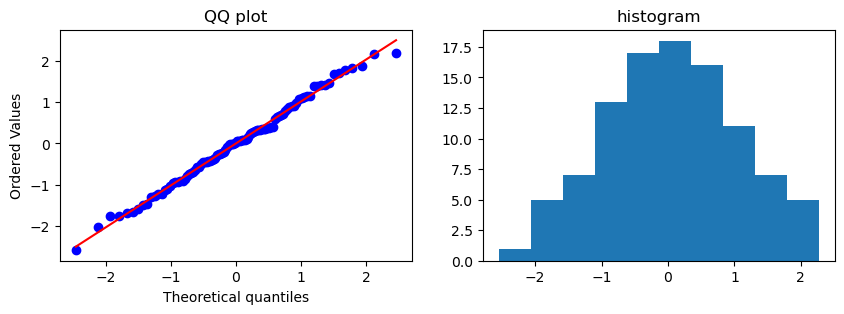

In [51]:
data = stats.norm.rvs(size=100, random_state=0)

from scipy.stats import shapiro, anderson, jarque_bera, kstest, zscore, probplot

# shapiro
sstat, p = shapiro(data)
print(f"shapiro: {sstat:.3f}, {p:.3f}")

# darling anderson
dstat, cv, sl = anderson(data, dist='norm')
print(f"anderson : {dstat:.3f}, cv {cv[2]:.3f}, significant level {sl[2]*0.01}")

# kstests
kstat, p = kstest(data, cdf=stats.norm.cdf)
print(f"kstest : {kstat:.3f}, {p:.3f}")

# jarque_bera
jstat, p = jarque_bera(data)
print(f"jarque_bera: {jstat:.3f}, {p:.3f}")

# qqplot
import matplotlib.pyplot as plt

zdata = zscore(data)
fig,ax = plt.subplots(1,2, figsize=(10,3))
(osm, odr), (slope, intercept, r) = probplot(zdata, plot=ax[0])
ax[0].set_title('QQ plot')

# histogram
ax[1].hist(data)
ax[1].set_title('histogram')
plt.show()

### k표본 등분산 검정 (Levene)

In [60]:
# 표본 수가 동일한 Levene 검정

data = pd.DataFrame({'fac1':[48,54,57,54,62], 'fac2':[73,63,66,64,74], 'fac3':[51,63,61,54,56]})
test_a = 0.05

# 수기 검정
n1 = len(data['fac1']); n2 = len(data['fac2']); n3 = len(data['fac3'])
N = n1+n2+n3; k = data.shape[1]
df1 = k-1; df2 = N-k; df3 = N-1

means = np.array(data.mean(axis=0))
zij1 = np.abs(data['fac1']-means[0])
zij2 = np.abs(data['fac2']-means[1])
zij3 = np.abs(data['fac3']-means[2])
zi1 = zij1.mean()
zi2 = zij2.mean()
zi3 = zij3.mean()
z = (zij1.sum() + zij2.sum() + zij3.sum()) / (len(zij1) + len(zij2) + len(zij3))

F = (N-k) / (k-1) * (n1*(zi1-z)**2 + n2*(zi2-z)**2 + n3*(zi3-z)**2) / sum((zij1-zi1)**2 + (zij2-zi2)**2 + (zij3-zi3)**2)

cv = stats.f.ppf(1-test_a, df1, df2)
sp = 1-stats.f.cdf(F, df1, df2)

print("[수기 검정]")
print(f" 오른쪽 검정 임계값: {cv:.3f}, 검정통계량: {F:.3f}")
print(f" 유의수준: {test_a:.3f}, 유의확률: {sp:.3f}")

[수기 검정]
 오른쪽 검정 임계값: 3.885, 검정통계량: 0.145
 유의수준: 0.050, 유의확률: 0.867


In [61]:
# 라이브러리 검정 : 표본 수가 같든지 다르든지 상관이 없다
lstat, p = stats.levene(data['fac1'], data['fac2'], data['fac3'], center='mean')
print("[라이브러리 검증]")
print(f" stat : {lstat:.3f}, p-value: {p:.3f}")

[라이브러리 검증]
 stat : 0.145, p-value: 0.867


In [65]:
# 표본 수가 다른 Levene 검정
data = [[36,41,42,49], [40,48,39,45,44], [35,37,42,34,32]]
test_a = 0.05

means = []
N = 0
k_sample_n = [] # 모집단 별 표본 갯수
for d in data:
    means.append(np.mean(d))
    N += len(d)
    k_sample_n.append(len(d))
k_sample_n = np.array(k_sample_n)    

k = len(k_sample_n)
n1 = k_sample_n[0]; n2 = k_sample_n[1]; n3 = k_sample_n[2]; 
df1 = k-1; df2 = N-k; df3 = N-1;
zij1 = np.abs(data[0] - means[0]); zij2 = np.abs(data[1] - means[1]); zij3 = np.abs(data[2] - means[2]);
zi1 = zij1.mean(); zi2 = zij2.mean(); zi3 = zij3.mean()
z = (zij1.sum() + zij2.sum() + zij3.sum()) / (len(zij1) + len(zij2) + len(zij3))

F = (N-k) / (k-1) * (n1*(zi1-z)**2 + n2*(zi2-z)**2 + n3*(zi3-z)**2) / (sum((zij1-zi1)**2) + sum((zij2-zi2)**2) + sum((zij3-zi3)**2))

cv = stats.f.ppf(1-test_a, df1, df2)
sp = 1-stats.f.cdf(F, df1, df2)

print("[수기 검정]")
print(f" 오른쪽 검정 임계값: {cv:.3f}, 검정통계량: {F:.3f}")
print(f" 유의수준: {test_a:.3f}, 유의확률: {sp:.3f}")

[수기 검정]
 오른쪽 검정 임계값: 3.982, 검정통계량: 0.096
 유의수준: 0.050, 유의확률: 0.909


In [66]:
# 라이브러리 검정
lstat, p = stats.levene(data[0], data[1], data[2], center='mean')
print("[라이브러리 검증]")
print(f" stat : {lstat:.3f}, p-value: {p:.3f}")

[라이브러리 검증]
 stat : 0.096, p-value: 0.909


### k표본 등분산 검정 (Bartlett)

In [69]:
# 정규성 샘플 생성
data1 = stats.norm.rvs(size=50, random_state=0)
data2 = stats.norm.rvs(size=50, random_state=1)
data3 = stats.norm.rvs(size=50, random_state=2)

bstat, p = stats.bartlett(data1, data2, data3)
print("[라이브러리 검증]")
print(f" stat : {bstat:.3f}, p-value: {p:.3f}")

[라이브러리 검증]
 stat : 1.082, p-value: 0.582


## 5-4 분산분석 : F분포
- 분산분석의 모든 가정(정규성, 등분산성, 독립성)을 만족할 때 standard ANOVA wlsgod
- 등분산을 만족하지 않거나 샘플이 불균형인 경우 각 상황에 맞는 분산분석과 사후검정을 진행한다
- 사후 검정 : k개 집단 중에서 적어도 한 집단의 모평균이 다르다고 판단(대립가설 채택)될 때, 어느 집단 간의 모평균이 다른지 확인하는 과정

1) 정규성, 등분산, 샘플사이즈 동일
    - 분산분석 : standard ANOVA
    - 사후검정 : Tukey HSD, snk, Dunnett, Duncan, REGWQ, REGWF
2) 정규성, 등분산, 샘플사이즈 다름
    - 분산분석 : standard ANOVA
    - 사후검정 : Fisher's LSD, Scheffe, Dunnett, Tukey HSD, Bonferroni, sidak, Hochberg GT2, Gabrial
3) 정규성, 이분산
    - 분산분석 : Welch's ANOVA, Brown-Forsythe ANOVA
    - 사후검정 : GamesHowell, Dunnett T3, Dunnett C, Tamhane T2
    
- Standard ANOVA는 종속변수와 독립변수의 개수에 따라서 구분
    1) 일원배치 분산분석 (One-way) : 종속변수 1개, 독립변수 1개
    2) 이원배치 분산분석 (Two-way) : 종속변수 1개, 독립변수 2개
    3) 다원배치 분산분석 (Multi-way) : 종속변수 1개, 독립변수 3개 이상
    4) 다변량 분산분석 (MANOVA, Multivariate) : 종속변수 2개 이상


- 일원배치 분산분석 : 집단을 나타내는 변수인 인자의 개수가 1개, F통계량 이용
    - 모집단 수에는 제한이 없으며, 각 표본의 수는 같지 않아도 됨
    - H0 : 집단 간 모평균에는 차이가 없다, H1 : 집단 간 모평균이 모두 같다고 할 수 없다

### 등분산인 one-way ANOVA

In [71]:
# one-way ANOVA (수준 별 샘플 사이즈가 동일한 완전확률화계획법)
## 각 수준의 모집단이 정규분포를 따르고 분산이 동일하다고 가정
data = pd.DataFrame({'A0':[76,80,78,79,83,74], 'A1':[82,75,83,78,85,80], 'A2':[79,87,88,86,84,82], 'A3':[81,74,76,78,73,70]})
test_a = 0.05

means = np.array(data.mean(axis=0)) # 모집단 별 평균
mu = np.mean(data.values) # 전체 평균
Vs = np.array(data.std(axis=0, ddof=1)**2) # 모집단(수준)별 분산
n = len(data.values.flatten()) # 표본 전체 개수
k = data.shape[0] # 모집단 별 표본 개수
level = data.shape[1] # 모집단(수준)의 개수
dfr = level-1 # 모집단 자유도
dfe = n - dfr - 1 # 오차 자유도

print('[수기 검정]')
print(" 수준별 평균\n ", means)
print(" 수준별 표본의 분산\n", Vs)
print(f" 자유도 {dfr}, {dfe}")

SSTR = (k * (means - mu)**2).sum() # 처리제곱 : 처리 평균들과 전체 평균의 제곱합
SSE = ((k-1) * Vs).sum() # 오차제곱 : 처리분산들과 오차 자유도를 곱한 합
SST = ((data.values - mu)**2).sum() # SSTR + SSE
MSR = SSTR/dfr
MSE = SSE/dfe
F = MSR / MSE

print(f" SSTR: {SSTR:.3f}, SSE: {SSE:.3f}, SST: {SST:.3f}")
print(f" MSR: {MSR:.3f}, MSE: {MSE:.3f}, F: {F:.3f}")

cv = stats.f.ppf(1-test_a, dfr, dfe)
sp = 1-stats.f.cdf(F, dfr, dfe)
print(f" 오른쪽 검정의 임계값: {cv:.3f}, 검정통계량: {F:.3f}")
print(f" 유의수준: {test_a:.3f}, 유의확률 {sp:.3f}")

[수기 검정]
 수준별 평균
  [78.33333333 80.5        84.33333333 75.33333333]
 수준별 표본의 분산
 [ 9.86666667 13.1        11.46666667 15.06666667]
 자유도 3, 20
 SSTR: 258.125, SSE: 247.500, SST: 505.625
 MSR: 86.042, MSE: 12.375, F: 6.953
 오른쪽 검정의 임계값: 3.098, 검정통계량: 6.953
 유의수준: 0.050, 유의확률 0.002


In [72]:
from statsmodels.stats.oneway import anova_oneway

oa = anova_oneway(data=data.melt()['value'], groups=data.melt()['variable'], use_var='equal')

print("[라이브러리 검정]")
print(f" stat{oa.statistic:.3f}, p-value: {oa.pvalue:.3f}")

[라이브러리 검정]
 stat6.953, p-value: 0.002


data.melt: 
   variable  value
0       A0     76
1       A0     80
2       A0     78
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    A0     A1   2.1667  0.713   -3.518  7.8513  False
    A0     A2      6.0 0.0363   0.3153 11.6847   True
    A0     A3     -3.0  0.469  -8.6847  2.6847  False
    A1     A2   3.8333 0.2647  -1.8513   9.518  False
    A1     A3  -5.1667 0.0831 -10.8513   0.518  False
    A2     A3     -9.0 0.0014 -14.6847 -3.3153   True
-----------------------------------------------------


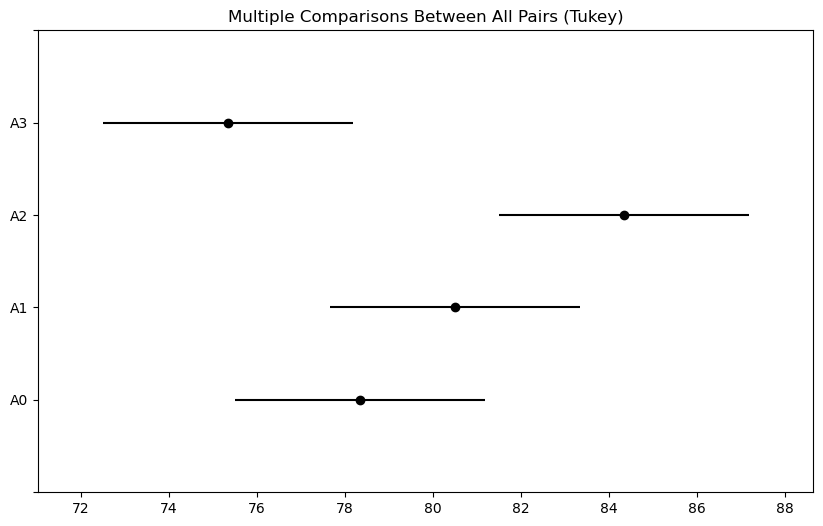

'\n사후 검정 결과 A0-A2, A2-A3간의 모평균 사이가 있는 것 확인\n'

In [73]:
# 사후 검정 (정규성, 등분산성, 샘플사이즈 동일 - Tukey HSD)
from statsmodels.sandbox.stats.multicomp import MultiComparison
from scipy.stats import ttest_ind

org_data = data.melt()
print("data.melt: \n", org_data.head(3))

mc = MultiComparison(data=org_data['value'], groups=org_data['variable']).tukeyhsd(alpha=0.05)
print(mc)

mc.plot_simultaneous()
plt.show()

"""
사후 검정 결과 A0-A2, A2-A3간의 모평균 사이가 있는 것 확인
"""

In [76]:
# one-way ANOVA (수준 별 샘플 사이즈가 다른 완전확률화계획법)
## 각 수준의 모집단이 정규분포를 따르고 분산이 동일하다고 가정

data = [[81,75,69,90,72,83], [65,80,73,79,81,69], [72,67,62,76,80], [89,94,79,88]]
data_df = pd.DataFrame(data, index=['A%d' %i for i in range(len(data))]).T
data_1d = sum(data, [])
test_a = 0.05
print("[데이터 확인]\n", data_df)

means = []; Vs = []; n = 0; k =[]
for d in data:
    means.append(np.mean(d))
    Vs.append(np.std(d, ddof=1)**2)
    n += len(d)
    k.append(len(d))
mu = np.mean(data_1d)
Vs = np.array(Vs)
k = np.array(k)
dfr = len(k)-1
dfe = n-1-dfr
print('[수기검정]')
print(" 수준 별 평균\n", means)
print(" 수준 별 표본의 분산\n", Vs)
print(f" 자유도 {dfr}, {dfe}")

SSTR = (k * (means - mu)**2).sum()
SSE = ((k-1) * Vs).sum()
SST = ((data_1d - mu)**2).sum()
MSR = SSTR / dfr ; MSE = SSE / dfe
F = MSR / MSE

print(f" SSTR: {SSTR:.3f}, SSE: {SSE:.3f}, SST: {SST:.3f}")
print(f" MSR: {MSR:.3f}, MSE: {MSE:.3f}, F: {F:.3f}")

cv = stats.f.ppf(1-test_a, dfr, dfe)
sp = 1-stats.f.cdf(F, dfr, dfe)
print(f" 오른쪽 검정의 임계값: {cv:.3f}, 검정통계량: {F:.3f}")
print(f" 유의수준: {test_a:.3f}, 유의확률 {sp:.3f}")

[데이터 확인]
      A0    A1    A2    A3
0  81.0  65.0  72.0  89.0
1  75.0  80.0  67.0  94.0
2  69.0  73.0  62.0  79.0
3  90.0  79.0  76.0  88.0
4  72.0  81.0  80.0   NaN
5  83.0  69.0   NaN   NaN
[수기검정]
 수준 별 평균
 [78.33333333333333, 74.5, 71.4, 87.5]
 수준 별 표본의 분산
 [60.66666667 43.1        50.8        39.        ]
 자유도 3, 17
 SSTR: 643.633, SSE: 839.033, SST: 1482.667
 MSR: 214.544, MSE: 49.355, F: 4.347
 오른쪽 검정의 임계값: 3.197, 검정통계량: 4.347
 유의수준: 0.050, 유의확률 0.019


In [80]:
oa = stats.f_oneway(*data) # *는 리스트 압축 해제 기능 # f_oneway(data[0], data[1], ...)
print("[라이브러리 검정]")
print(f" stat: {oa.statistic:.3f}, p-value: {oa.pvalue:.3f}")

[라이브러리 검정]
 stat: 4.347, p-value: 0.019


In [79]:
# 사후검정 (정규성, 등분산, 샘플 사이즈 다름 - Bonferroni)
from statsmodels.sandbox.stats.multicomp import MultiComparison

org_data = data_df.melt().dropna()
print("[라이브러리 검정]")
print("data_df.melt: \n", org_data.head())

mc = MultiComparison(data = org_data['value'], groups = org_data['variable']
                    ).allpairtest(testfunc = stats.ttest_ind, method='bonf')
print(mc[0])

[라이브러리 검정]
data_df.melt: 
   variable  value
0       A0   81.0
1       A0   75.0
2       A0   69.0
3       A0   90.0
4       A0   72.0
Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.008
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
    A0     A1  0.9218 0.3783       1.0  False
    A0     A2  1.5262 0.1613    0.9678  False
    A0     A3 -1.9591 0.0858    0.5146  False
    A1     A2  0.7506 0.4721       1.0  False
    A1     A3 -3.1239 0.0141    0.0849  False
    A2     A3 -3.5486 0.0094    0.0562  False
---------------------------------------------


### 이분산 one-way ANOVA

In [82]:
# use_var 파라미터 설정
# 'equal' : standard ANOVA, 'unequal':welch ANOVA, 'bf':brown-Forsythe

data = pd.DataFrame({'A1':[76,80,78,79,83,74], 'A2':[82,75,83,78,85,80], 'A3':[79,87,88,86,84,82], 'A4':[81,74,76,78,73,70]})

## welch's one-way ANOVA
from statsmodels.stats.oneway import anova_oneway

welch = anova_oneway(data=data.melt()['value'], groups=data.melt()['variable'], use_var='unequal')
print(" [Welch's one-way ANOVA]")
print(f" stats: {welch.statistic:.3f}, p: {welch.pvalue:.3f}")

## Brown-Forsythe one-way ANOVA
bf = anova_oneway(data=data.melt()['value'], groups=data.melt()['variable'], use_var='bf')
print(" [Brown-Forsythe one-way ANOVA]")
print(f" stats: {bf.statistic:.3f}, p: {bf.pvalue:.3f}")

 [Welch's one-way ANOVA]
 stats: 6.019, p: 0.011
 [Brown-Forsythe one-way ANOVA]
 stats: 6.953, p: 0.002


In [85]:
# 사후검정 (정규성, 이분산 - GamesHowell)
from pingouin import pairwise_gameshowell

org_data = data.melt()
gw = pairwise_gameshowell(dv='value', between='variable', data=org_data)
print(gw)

    A   B    mean(A)    mean(B)      diff        se         T        df  \
0  A1  A2  78.333333  80.500000 -2.166667  1.956471 -1.107436  9.805651   
1  A1  A3  78.333333  84.333333 -6.000000  1.885618 -3.181981  9.944065   
2  A1  A4  78.333333  75.333333  3.000000  2.038518  1.471657  9.583173   
3  A2  A3  80.500000  84.333333 -3.833333  2.023473 -1.894432  9.955991   
4  A2  A4  80.500000  75.333333  5.166667  2.166667  2.384615  9.951485   
5  A3  A4  84.333333  75.333333  9.000000  2.102908  4.279788  9.819241   

       pval    hedges  
0  0.693488 -0.590196  
1  0.041365 -1.695801  
2  0.488889  0.784303  
3  0.289721 -1.009616  
4  0.143511  1.270854  
5  0.007620  2.280865  


## 이원배치 분산분석 (Two-way ANOVA)
- 인자의 수가 2개 이상
- 인자의 종류에는 모수인자(Fixed), 변량인자(Random)가 있다
    - '모수 + 모수'의 조합 별 데이터 수가 1개이면 반복이 없는 / 2개 이상이면 반복이 있는 이원배치 분산분석
    - '모수 + 변량'의 조합 별 데이터 수가 1개이면 난괴법 혹은 확률화블럭계획법(RBD), 2개 이상이면 반복기 있는 이원배치 혼합모형(Mixed Model)
- H0 : 변수 A에 따른 종속변수 값에는 차이가 없고, 변수 B에 따른 종속변수 값에도 차이가 없으며, AB상호작용 효과가 없다
- H1 : 변수 A에 따른 종속변수 값에 차이가 있거나, 변수 B에 따른 종속변수 값에 차이가 있거나, AB상호작용 효과가 있다
- 사후검정
    - '모수 + 모수' 조합인 경우
        - 교호작용에 대한 검증이 반드시 필요. 
            - 교호작용이 유의미할 경우 주효과 검정은 무의미하고 교호작용 효과만 검정
            - 교호작용이 없을 경우에는 유의하지 않은 교호작용 효과를 오차항에 풀링한 후, 모수 인자들의 주효과 검정 진행
    - '모수 + 변량' 조합인 경우
        - 교호작용이 유의할 때, 모수인자의 주효과 검정만 의미가 있고, 교호작용이 유의하지 않으면 유의하지 않은 교호작용 효과를 오차항에 풀링한 후, 모수인자의 주효과 검정 진행
        - 변량인자에 대한 통계량은 유의성 검정을 위한것이 아니라 이원배치 분산분석 설계의 상대적 효율성을 평가하는데 쓰임


### 등분산인 two-way ANOVA (모수인자-모수인자)

In [88]:
# 반복이 없는 이원배치 분산분석 : 반복이 없으므로 교호작용 효과는 검출할 수 없다
## A, B 모두 모수인자
data = pd.DataFrame({'A':[1,2,3,1,2,3,1,2,3,1,2,3], 'B':[1,1,1,2,2,2,3,3,3,4,4,4], 'Y':[4,3,5,5,7,6,7,8,9,8,10,12]})
print("[데이터 확인]\n", pd.crosstab(data['A'], data['B'], values=data['Y'], aggfunc=list))

n = len(data['Y']); a = len(data['A'].value_counts()); b = len(data['B'].value_counts()) # 수준 갯수
dfa = a-1; dfb = b-1; dfe = dfa*dfb
y_mean = data['Y'].mean(); # 전체 평균
yi_mean = data.groupby('A').mean()['Y'].values # 인자 A별 평균
yj_mean = data.groupby('B').mean()['Y'].values # 인자 B별 평균

SST = sum((data['Y'] - y_mean)**2)
SSA = sum((yi_mean - y_mean)**2) * b
SSB = sum((yj_mean - y_mean)**2) * a

SSE = 0 # 오차제곱합
yij_data = data['Y'].values.reshape(-1, a)
for i in range(a):
    for j in range(b):
        SSE += (yij_data[j,i] - yi_mean[i] - yj_mean[j] + y_mean)**2
MSA = SSA / dfa; MSB = SSB / dfb; MSE = SSE/dfe

atable1 = pd.DataFrame({"요인":['A', 'B', 'E'], 'DF':[dfa, dfb, dfe], 'SS':[SSA, SSB, SSE],
                      'MS':[MSA, MSB, MSE], 'F':[MSA/MSE, MSB/MSE, 'none'], 
                       'PV': [1-stats.f.cdf(MSA/MSE, dfa, dfe), 1-stats.f.cdf(MSB/MSE, dfb, dfe), 'none']})

print('[수기 검정]')
print('ANOVA Table: \n', atable1)

[데이터 확인]
 B    1    2    3     4
A                     
1  [4]  [5]  [7]   [8]
2  [3]  [7]  [8]  [10]
3  [5]  [6]  [9]  [12]
[수기 검정]
ANOVA Table: 
   요인  DF    SS    MS     F        PV
0  A   2   8.0   4.0   4.0  0.078717
1  B   3  60.0  20.0  20.0  0.001586
2  E   6   6.0   1.0  none      none


In [90]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols("Y ~ C(A)+C(B)", data=data).fit()
atable2 = anova_lm(model)
print('[라이브러리 검정]')
print(atable2)

[라이브러리 검정]
           df  sum_sq  mean_sq     F    PR(>F)
C(A)      2.0     8.0      4.0   4.0  0.078717
C(B)      3.0    60.0     20.0  20.0  0.001586
Residual  6.0     6.0      1.0   NaN       NaN


In [95]:
# 반복이 있는 이원배치 분산분석
## A, B 모두 모수인자
data = pd.DataFrame({'A':[1,1,1,2,2,2,3,3,3, 1,1,1,2,2,2,3,3,3, 1,1,1,2,2,2,3,3,3, 1,1,1,2,2,2,3,3,3,], # 열수준
                     'B':[1,1,1,1,1,1,1,1,1, 2,2,2,2,2,2,2,2,2, 3,3,3,3,3,3,3,3,3, 4,4,4,4,4,4,4,4,4,], # 행수준
                     'Y':[64,66,70,72,81,64,74,51,65, 65,63,58,57,43,52,47,58,67, 59,68,65,66,71,59,58,45,42, 
                         58,50,49,57,61,53,53,59,38]})
print("[데이터 확인]\n", pd.crosstab(data['A'], data['B'], values = data['Y'], aggfunc=list))

n = len(data['Y']); a = len(data['A'].value_counts()); b = len(data['B'].value_counts())
r = data.groupby(['A','B']).count().iloc[0,0]
dfa = a-1; dfb = b-1; dfab = dfa*dfb; dfe = n - a*b

y_mean = data['Y'].mean()
yi_mean = data.groupby('A').mean()['Y'].values # 인자 A별 평균
yj_mean = data.groupby('B').mean()['Y'].values # 인자 B별 평균
yij_mean = data.groupby(['B', 'A']).mean().values.flatten().reshape(-1, a) # 인자A-B 조합별 데이터 평균

SST = sum((data['Y'] - y_mean)**2)
SSA = sum((yi_mean - y_mean)**2) * b * r
SSB = sum((yj_mean - y_mean)**2) * a * r

ssab = 0
for i in range(a):
    for j in range(b):
        ssab += (yij_mean[j, i] - yi_mean[i] - yj_mean[j] + y_mean)**2
SSAB = ssab * r

SSE = 0
yij_data = data['Y'].values.reshape(-1, a, r)
for i in range(a):
    for j in range(b):
        SSE += sum((yij_data[j,i] - yij_mean[j,i])**2)

MSA = SSA / dfa
MSB = SSB / dfb
MSAB = SSAB / dfab
MSE = SSE / dfe

atable1 = pd.DataFrame({
    "요인" : ['A', 'B', 'AxB' , 'E'],
    'DF' : [dfa, dfb, dfab, dfe],
    'SS' : [SSA, SSB, SSAB, SSE], 
    'MS' : [MSA, MSB, MSAB, MSE],
    'F' : [MSA/MSE, MSB/MSE, MSAB/MSE, 'None'],
    'PV' : [1-stats.f.cdf(MSA/MSE, dfa, dfe), 1-stats.f.cdf(MSB/MSE, dfb,dfe), 1-stats.f.cdf(MSAB/MSE, dfab, dfe), 'None'],
    })

print('[수기 검정]')
print(f"ANOVA Table: \n", atable1)
print("교호작용이 유의하지 않으므로, 이를 E에 풀링하고 A,B의 주효과 확인")

pooled_SSE = SSAB + SSE
pooled_dfe = dfab + dfe
pooled_MSE = pooled_SSE / pooled_dfe

atable2 = pd.DataFrame({
    "요인" : ['A', 'B', 'E'],
    'DF' : [dfa, dfb, pooled_dfe],
    'SS' : [SSA, SSB, pooled_SSE], 
    'MS' : [MSA, MSB, pooled_MSE],
    'F' : [MSA/pooled_MSE, MSB/pooled_MSE, 'None'],
    'PV' : [1-stats.f.cdf(MSA/pooled_MSE, dfa, pooled_dfe), 1-stats.f.cdf(MSB/pooled_MSE, dfb, pooled_dfe), 'None'],    
    })

print("pooling 후, ANOVA Table:\n", atable2)
print("유의수준 0.05 기준 A의 수준별 모평균 차이는 통계적으로 유의하지 않지만, B의 수준별 모평균 차이는 통꼐적으로 유의한 것으로 나타났다. 이에 B의 사후 검정이 필요하다")

[데이터 확인]
 B             1             2             3             4
A                                                        
1  [64, 66, 70]  [65, 63, 58]  [59, 68, 65]  [58, 50, 49]
2  [72, 81, 64]  [57, 43, 52]  [66, 71, 59]  [57, 61, 53]
3  [74, 51, 65]  [47, 58, 67]  [58, 45, 42]  [53, 59, 38]
[수기 검정]
ANOVA Table: 
     요인  DF           SS          MS         F        PV
0    A   2   342.388889  171.194444    3.0815  0.064393
1    B   3  1002.888889  334.296296  6.017333  0.003307
2  AxB   6   588.944444   98.157407  1.766833  0.148795
3    E  24  1333.333333   55.555556      None      None
교호작용이 유의하지 않으므로, 이를 E에 풀링하고 A,B의 주효과 확인
pooling 후, ANOVA Table:
   요인  DF           SS          MS         F        PV
0  A   2   342.388889  171.194444  2.671744  0.085542
1  B   3  1002.888889  334.296296   5.21719  0.005102
2  E  30  1922.277778   64.075926      None      None
유의수준 0.05 기준 A의 수준별 모평균 차이는 통계적으로 유의하지 않지만, B의 수준별 모평균 차이는 통꼐적으로 유의한 것으로 나타났다. 이에 B의 사후 검정이 필요하다


In [98]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols("Y~C(A)+C(B)+C(A):C(B)", data=data).fit()
atable3 = anova_lm(model)
print("[라이브러리 검정]")
print(atable3) 
print("유의수준 0.05 기준으로, 교호작용이 유의하지 않음 확인")

model = ols("Y ~ C(A) + C(B)", data=data).fit()
atable4 = anova_lm(model)
print(atable4)
print("풀링 후 주효과 확인, 유의수준 0.05 기준 B는 주효과 있는 것으로 확인")

[라이브러리 검정]
             df       sum_sq     mean_sq         F    PR(>F)
C(A)        2.0   342.388889  171.194444  3.081500  0.064393
C(B)        3.0  1002.888889  334.296296  6.017333  0.003307
C(A):C(B)   6.0   588.944444   98.157407  1.766833  0.148795
Residual   24.0  1333.333333   55.555556       NaN       NaN
유의수준 0.05 기준으로, 교호작용이 유의하지 않음 확인
            df       sum_sq     mean_sq         F    PR(>F)
C(A)       2.0   342.388889  171.194444  2.671744  0.085542
C(B)       3.0  1002.888889  334.296296  5.217190  0.005102
Residual  30.0  1922.277778   64.075926       NaN       NaN
풀링 후 주효과 확인, 유의수준 0.05 기준 B는 주효과 있는 것으로 확인


### 등분산인 two-way ANOVA (모수인자-변량인자)

In [102]:
# 반복이 없는 경우 : 확률화블럭계획법
## A가 모수인자 B가 변량인자
## 반복이 없는 이원배치 분산분석과 동일한 방법으로 진행

data = pd.DataFrame({
    'A' : [1,2,3,1,2,3,1,2,3,1,2,3],
    'B' : [1,1,1,2,2,2,3,3,3,4,4,4],
    'Y' : [4,3,5,5,7,6,7,8,9,8,10,12],
})
print("[데이터 확인]\n", pd.crosstab(data['A'], data['B'], values=data['Y'],aggfunc=list))

n = len(data['Y']); a = len(data['A'].value_counts()); b = len(data['B'].value_counts())
dfa = a-1; dfb = b-1; dfe = dfa * dfb

y_mean = data['Y'].mean()
yi_mean = data.groupby('A').mean()['Y'].values
yj_mean = data.groupby('B').mean()['Y'].values

SST = sum((data['Y'] - y_mean)**2)
SSA = sum((yi_mean - y_mean)**2) * b
SSB = sum((yj_mean - y_mean)**2) * a

SSE = 0
yij_data = data['Y'].values.reshape(-1,a)
for i in range(a):
    for j in range(b):
        SSE += (yij_data[j,i] - yi_mean[i] - yj_mean[j] + y_mean) ** 2

MSA = SSA / dfa 
MSB = SSB / dfb
MSE = SSE / dfe

atable1 = pd.DataFrame({
    '요인': ['A','B','E'],
    'DF' : [dfa, dfb, dfe],
    'SS' : [SSA, SSB, SSE],
    'MS' : [MSA, MSB, MSE],
    'F' : [MSA/MSE, MSB/MSE, 'None'],
    'PV' : [1-stats.f.cdf(MSA/MSE, dfa, dfe), 1-stats.f.cdf(MSB/MSE, dfb, dfe), 'None']
    })

print('[수기 검정]')
print('ANOVA Table:\n', atable1)
print(f" B 변량의 분산 추정치: {(MSB-MSE)/a:.3f}")

[데이터 확인]
 B    1    2    3     4
A                     
1  [4]  [5]  [7]   [8]
2  [3]  [7]  [8]  [10]
3  [5]  [6]  [9]  [12]
[수기 검정]
ANOVA Table:
   요인  DF    SS    MS     F        PV
0  A   2   8.0   4.0   4.0  0.078717
1  B   3  60.0  20.0  20.0  0.001586
2  E   6   6.0   1.0  None      None
 B 변량의 분산 추정치: 6.333


In [103]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols("Y ~ C(A) + C(B)", data=data).fit()
atable2 = anova_lm(model)
print(atable2)
print("""
    모수인자 A는 주효과 검정결과 유의하지 않고, 변량인자 B는 주효과 검정 대신 모분산 추정
""")

           df  sum_sq  mean_sq     F    PR(>F)
C(A)      2.0     8.0      4.0   4.0  0.078717
C(B)      3.0    60.0     20.0  20.0  0.001586
Residual  6.0     6.0      1.0   NaN       NaN

    모수인자 A는 주효과 검정결과 유의하지 않고, 변량인자 B는 주효과 검정 대신 모분산 추정



In [107]:
# 반복이 있는 경우 : 이원배치 혼합모형(mixed model)
## A가 모수인자, B가 변량인자
data = pd.DataFrame({
    'A' : [1,1,1,2,2,2,3,3,3, 1,1,1,2,2,2,3,3,3, 1,1,1,2,2,2,3,3,3, 1,1,1,2,2,2,3,3,3,],
    'B' : [1,1,1,1,1,1,1,1,1, 2,2,2,2,2,2,2,2,2, 3,3,3,3,3,3,3,3,3, 4,4,4,4,4,4,4,4,4,],
    'Y' : [64,66,70,72,81,64,74,51,65 ,65,63,58,57,43,52,47,58,67, 59,68,65,66,71,59,58,45,42, 58,50,49,57,61,53,53,59,38]
})

print("[데이터 확인]\n", pd.crosstab(data['A'], data['B'], values=data['Y'], aggfunc=list))

n = len(data['Y']); a = len(data['A'].value_counts()); b = len(data['B'].value_counts())
r = data.groupby(['A', 'B']).count().iloc[0,0]
dfa = a-1; dfb = b-1; afab = dfa*dfb; dfe = n - a*b

y_mean = data['Y'].mean()
yi_mean = data.groupby('A').mean()['Y'].values
yj_mean = data.groupby('B').mean()['Y'].values
yij_mean = data.groupby(['B', 'A']).mean().values.flatten().reshape(-1, a)

SST = sum((data['Y'] - y_mean)**2)
SSA = sum((yi_mean-y_mean)**2) * b * r
SSB = sum((yj_mean-y_mean)**2) * a * r
ssab = 0
for i in range(a):
    for j in range(b):
        ssab += (yij_mean[j,i] - yi_mean[i] - yj_mean[j] + y_mean)**2
SSAB = ssab * r
SSE = 0 
yij_data = data['Y'].values.reshape(-1, a, r)
for i in range(a):
    for j in range(b):
        SSE += sum((yij_data[j,i] - yij_mean[j, i])**2)
        
MSA = SSA / dfa; MSB = SSB / dfb; MSAB = SSAB / dfab; MSE = SSE / dfe
atable1 = pd.DataFrame({
    "요인" : ['A', 'B', 'AxB', 'E'],
    "DF" : [dfa, dfb, dfab, dfe],
    'SS' : [SSA, SSB, SSAB, SSE],
    'MS' : [MSA, MSB, MSAB, MSE],
    'F' : [MSA/MSAB, MSB/MSE, MSAB/MSE, 'None']
})

print('[수기 검정]')
print("ANOVA Table: \n", atable1.round(1))
print(f' A-B 교호작용 검정 :{MSAB/MSE:.3f}, p-value {1-stats.f.cdf(MSAB/MSE, dfab, dfe):.3f}')
print(f' B 변량의 분산 추정: {(MSB-MSE)/(a*r):.3f}')

pooled_SSE = SSAB+SSE; pooled_dfe = dfab+dfe; pooled_MSE = pooled_SSE / pooled_dfe

atable2 = pd.DataFrame({
    "요인" : ['A', 'B', 'E'],
    "DF" : [dfa, dfb, pooled_dfe],
    'SS' : [SSA, SSB, pooled_SSE],
    'MS' : [MSA, MSB, pooled_MSE],
    'F' : [MSA/pooled_MSE, MSB/pooled_MSE, 'None']
})

print("pooling 후, ANOVA table:\n", atable2.round(1))
print(f" A 주효과 검정: {MSA/pooled_MSE:.3f}, p-value {1-stats.f.cdf(MSA/pooled_MSE, dfa, pooled_dfe):.3f}")


[데이터 확인]
 B             1             2             3             4
A                                                        
1  [64, 66, 70]  [65, 63, 58]  [59, 68, 65]  [58, 50, 49]
2  [72, 81, 64]  [57, 43, 52]  [66, 71, 59]  [57, 61, 53]
3  [74, 51, 65]  [47, 58, 67]  [58, 45, 42]  [53, 59, 38]
[수기 검정]
ANOVA Table: 
     요인  DF      SS     MS         F
0    A   2   342.4  171.2  1.744081
1    B   3  1002.9  334.3  6.017333
2  AxB   6   588.9   98.2  1.766833
3    E  24  1333.3   55.6      None
 A-B 교호작용 검정 :1.767, p-value 0.149
 B 변량의 분산 추정: 30.971
pooling 후, ANOVA table:
   요인  DF      SS     MS         F
0  A   2   342.4  171.2  2.671744
1  B   3  1002.9  334.3   5.21719
2  E  30  1922.3   64.1      None
 A 주효과 검정: 2.672, p-value 0.086


In [114]:
# prac 1
# 모분산 정보가 없을 때, 모평균에 대한 95% 신뢰수준의 신뢰구간은?
alpha = 0.05; std = 3;
data = [10, 19, 15, 11, 13, 14, 18]
x = np.mean(data); s = np.std(data, ddof=1); n = len(data); df=n-1;

# 모분산을 모르는 경우
se = s/np.sqrt(n)
conf_t = stats.t.ppf(1-alpha/2, df)
me = conf_t*se
print(round(x-me, 3), round(x+me, 3))

# 모표준편차가 3이라는 것을 알고 있을 때, 모평균에 대한 95% 신뢰구간은?
# 모분산을 아는 경우
se = std/np.sqrt(n)
conf_z = stats.norm.ppf(1-alpha/2)
me = conf_z * se
print(round(x-me, 3), round(x+me, 3))



11.185 17.386
12.063 16.508


In [115]:
# prac 2
# 어느 회사 불량률이 5%로 알려져 있다면 95% 신뢰수준에서 오차의 한계가 3$가 되도록 하는 최소 표본사이즈
p = 0.05; me = 0.03; alpha = 0.05
conf_z = stats.norm.ppf(1-alpha/2)
size = conf_z ** 2 * p * (1-p) / me**2
round(size,2)

202.74

In [119]:
# prac 3
# 임의로 추출한 표본 30개의 분산을 계산했더니 50일 때, 신뢰도 95%로 모분산의 신뢰구간을 추정하시오
n = 30; df = n-1; v = 50; alpha =0.05

conf_c1 = stats.chi2.ppf(1-alpha/2, df)
conf_c2 = stats.chi2.ppf(alpha/2, df)
cr1 = df*v/conf_c1; cr2 = df*v/conf_c2

round(cr1, 2), round(cr2, 2)

(31.71, 90.36)

In [120]:
# prac 4
# 뽑기 기계에서 20번 뽑기를 했더니, 그 중 5개는 미니카였다. 해당 뽑기 기계에 있는 장난감들 중 미니카의 비율을 p라고 한다면 모비율 p에 대한 95% 신뢰구간?
p = 5/20; n = 20
se = np.sqrt(p*(1-p)/n)
alpha = 0.05
conf_z = stats.norm.ppf(1-alpha/2)
me = conf_z * se
round(p-me, 3), round(p+me,3)

(0.06, 0.44)

In [121]:
# prac 5
# A국가 성인 남성의 흡연율이 35%라고 발표하였으나, B는 그것보다 더 높은 수치를 예상. 이에 성인 남성 중 450명을 임의 추출하여 조사한 결과 180명이 흡연자
# 가설검증 후 검정 결과 서술 (유의수준 0.05)
p0 = 0.35; n =450; x = 180; p = x/n; alpha = 0.05

se = np.sqrt(p0 * (1-p0) / n)
zstat = (p-p0)/se
sp = 1 - stats.norm.cdf(zstat)
cv = stats.norm.ppf(1-alpha)

print(f"1. 유의수준 {alpha:.3f}와 유의확률 {sp:.3f} 비교")
print(f"2. 임계값 {cv:.3f}와 검정통계량 {zstat:.3f}를 비교")
print("검정통계량의 유의확률이 작기 때문에 귀무가설을 기각하여, 성인 남성의 흠연률은 35% 보다 높다")

1. 유의수준 0.050와 유의확률 0.013 비교
2. 임계값 1.645와 검정통계량 2.224를 비교
검정통계량의 유의확률이 작기 때문에 귀무가설을 기각하여, 성인 남성의 흠연률은 35% 보다 높다


In [ ]:
# prac 6
# 모평균을 모르는 상황에서 표본의 정보를 통해 모분산이 10인이 아닌지 여부를 검정하고자 함
# 50개 표본 임의 추출하여 분산은 8.8로 나타남. 이를 유의수준 0.05에서 검정
n = 50; df = n-1; v = 8.8; v0 = 10; alpha = 0.05

cstat = df * v / v0
if stats.chi2.cdf(cstat, df) < 0.5:
    sp = (stats.chi2.cdf(cstat, df))*2
else:
    sp = (1-stats.chi2.cdf(cstat, df))*2
cv1 = stats.chi2.ppf(alpha/2, df)
cv2 = stats.chi2.ppf(1-alpha/2, df)

print(f"1. 유의수준 {alpha:.3f}와 유의확률 {sp:.3f} 비교")
print(f"2. 임계값 {cv:.3f}와 검정통계량 {zstat:.3f}를 비교")
print("검정통계량의 유의확률이 작기 때문에 귀무가설을 기각하여, 성인 남성의 흠연률은 35% 보다 높다")

In [122]:
# prac 7
# 50명의 당뇨환자에 대해 신약 투약 전후 평균 혈당차이가 15, 표준편차가 4일 때 평균 혈당차이가 존재하는지 검정 (유의수준 0.05)

n = 50; df = n-1; d_mean = 15; s = 4; alpha = 0.05
d0 = 0; se = s / np.sqrt(n) ; tstat = (d_mean - d0)/se
sp = (1-stats.t.cdf(np.abs(tstat), df))*2
cv = stats.t.ppf(1-alpha/2, df)
cv = f"+/- {cv:.3f}"

print(f"1. 유의수준 {alpha:.3f}와 유의확률 {sp:.3f}를 비교")
print(f"2. 임계값 {cv}와 검정통계량 {tstat:.3f}를 비교")

1. 유의수준 0.050와 유의확률 0.000를 비교
2. 임계값 +/- 2.010와 검정통계량 26.517를 비교


In [124]:
# prac 8 
# 가수에 대한 호감도가 남녀별로 다른지 알아보고자 데이터를 얻음. 지지율의 차이 검정 (유의수준 0.05)
n1 = 100; p1 = 0.3; n2 = 180; p2 = 0.35
d = p1-p2; alpha = 0.05; d0 = 0

pe = (n1*p1 + n2*p2) / (n1+n2)
se = np.sqrt(pe * (1-pe) * (1/n1 + 1/n2))
zstat = d/se
sp = (1-stats.norm.cdf(np.abs(zstat)))*2
print(f"검정통계량 {zstat:.3f}, 유의롹률 {sp:.3f}")

검정통계량 -0.851, 유의롹률 0.395


In [125]:
# prac 9
# A 브랜드의 제품 14개를 추출하여 구한 평균과 표준편차는 100, 5. B 브랜드 제품 12개를 추출하여 구한 평균과 표준편차는 110, 6
# 두 제품의 평균 차이 검정 (유의 수준 0.05)
x1 = 100; s1 = 5; x2 = 110; s2 = 6 ; n1 = 14; n2 = 12; alpha = 0.05
d0 = 0; d = x1 - x2

df = ((s1**2)/n1 + (s2**2)/n2)**2 / (1/(n1-1) * ((s1**2)/n1)**2 + 1/(n2-1)*((s2**2/n2)**2))
se = np.sqrt(s1**2/n1 + s2**2/n2)
tstat = (x1-x2-d0)/se
sp = (1-stats.t.cdf(np.abs(tstat), df)) * 2
print(f"검정통계량 {tstat:.3f}, 유의롹률 {sp:.3f}")

검정통계량 -4.571, 유의롹률 0.000


   sepallength  sepalwidth  petallength  petalwidth  target
0          5.1         3.5          1.4         0.2  setosa
1          4.9         3.0          1.4         0.2  setosa
2          4.7         3.2          1.3         0.2  setosa
3          4.6         3.1          1.5         0.2  setosa
4          5.0         3.6          1.4         0.2  setosa
검정통계량 119.265, 유의확률 0.000
ANOVA table: 
              df  sum_sq  mean_sq        F  PR(>F)
C(target)    2.0  63.212   31.606  119.265     0.0
Residual   147.0  38.956    0.265      NaN     NaN
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor     0.93   0.0 0.6862 1.1738   True
    setosa  virginica    1.582   0.0 1.3382 1.8258   True
versicolor  virginica    0.652   0.0 0.4082 0.8958   True
---------------------------------------------------------


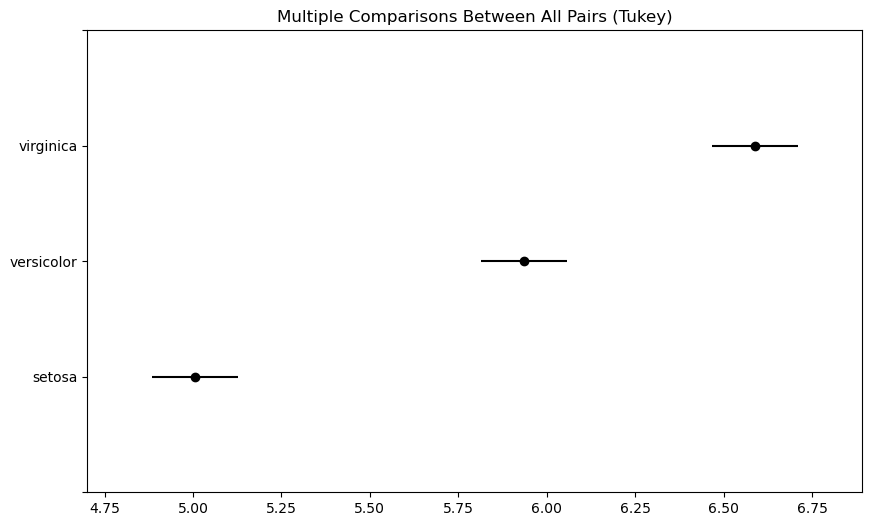

In [131]:
# prac 10
# iris target 별로 sepal length 평균의 차이 검정. 있다면 어떤 타겟들 차이인지 사후검정
from sklearn.datasets import load_iris

load = load_iris()
feature_names = list(map(lambda x:x.replace("(cm)","").replace(' ', ''), load['feature_names']))
data = pd.DataFrame(np.c_[load['data'], load['target']], columns = feature_names+['target'])
data['target'] = data['target'].map({0:load['target_names'][0], 1:load['target_names'][1], 2:load['target_names'][2]})
print(data.head())

from statsmodels.stats.oneway import anova_oneway
oa = anova_oneway(data=data['sepallength'], groups=data['target'], use_var='equal')
print(f"검정통계량 {oa.statistic:.3f}, 유의확률 {oa.pvalue:.3f}")

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols('sepallength ~ C(target)', data=data).fit()
print("ANOVA table: ")
print(anova_lm(model).round(3))

from statsmodels.sandbox.stats.multicomp import MultiComparison
mc = MultiComparison(data=data['sepallength'], groups=data['target']).tukeyhsd(alpha=0.05)
print(mc)

mc.plot_simultaneous()
plt.show()